# Epidemiological Determinants of Q Fever in Georgia Through Regression Modeling
#### Author: Farshad Parsayan; Supervised by: Dr. Giorgi Chakhunashvili; Published by: IEEE - ACDSA 2026
##### This repository contains the analysis scripts used to generate the statistical results and figures presented in the paper.
---

## Variable Overview
The dataset contains variables grouped into the following domains:

- **Demographics**: family members, age, gender, ethnicity, residence region, urban/rural status, occupation.  
- **Animal Exposures**: livestock ownership (cattle, sheep, pigs, dogs, cats, rabbits, horses), number of animals owned, domestic animal care, use of PPE.  
- **Environmental / Vector Exposures**: insect exposure, rodent exposure, blood splash, skinning.  
- **Clinical Features**: fever, rash, rash type, eschar, headache, myalgia, arthralgia, anemia, pneumonia, lymphadenopathy, leucopenia, thrombocytopenia.  
- **Laboratory**: Q fever serology (binary), Q fever titer (continuous).  

---

## Codebook

### Demographics
| Variable              | Codes / Values |
|-----------------------|----------------|
| **Gender**            | 0 = Male; 1 = Female |
| **Ethnicity**         | 1 = Georgian; 2 = Azerbaijani; 3 = Armenian; 4 = Abkhazian; 5 = Russian; 6 = Ossetian; 7 = Ukrainian; 8 = Greek |
| **Residence Region**  | 1 = Abkhazia; 2 = Adjara; 3 = Guria; 4 = Imereti; 5 = Kakheti; 6 = Mtskheta; 7 = Racha; 8 = Samegrelo-Zemo Svaneti; 9 = Samtskhe; 10 = Kvemo Kartli; 11 = Shida Kartli; 12 = Tbilisi |
| **Exposure Region**   | *Same coding as Residence Region* |
| **Urban–Rural**       | 0 = Urban; 1 = Rural |
| **Occupation**        | 1 = Agricultural Worker; 2 = Housewife; 3 = Unemployed; 4 = Retired; 5 = Medical Personnel; 6 = Student; 7 = Teacher/Lecturer; 8 = Office Worker; 9 = Driver; 10 = Industrial Worker; 11 = Grocery Store Worker; 12 = Veterinarian; 13 = Military/Policeman; 14 = Other; 15 = Cook; 99 = Unknown |

---

### Health & Disease
| Variable                   | Codes / Values |
|----------------------------|----------------|
| **Q Fever (Serology)**     | 0 = Negative; 1 = Positive |
| **Q Fever Titer**          | Continuous (e.g., 0.24 – 32.8) |
| **Rickettsial/Coxiella Disease** | 0 = No; 1 = Yes |
| **Symptoms**               | 0 = No; 1 = Yes |
| **Rash Type**              | 1 = Maculopapular; 2 = Macular; 3 = Purpura; 4 = Vesicular; 5 = Other |

---

### Exposures
| Variable          | Codes / Values |
|-------------------|----------------|
| **Insect Exposure**   | 0 = Not Exposed; 1 = Exposed |
| **Rodent Exposure**   | 0 = Not Exposed; 1 = Exposed |
| **Urban–Rural Exposure** | 0 = Urban; 1 = Rural |
| **Other Exposures**   | 0 = No; 1 = Yes (Blood splash, Skinning, etc.) |

---

### Animal Ownership
| Variable                     | Codes / Values |
|------------------------------|----------------|
| **Ownership (Dog, Cat, Cattle, Sheep, Pig, Rabbit, Horse)** | 0 = No; 1 = Yes |
| **Number of Animals Owned**  | Continuous (count of animals per household) |
| **Delivery of Domestic Animals** | 0 = No; 1 = Yes |
| **Animal Care**              | 0 = No; 1 = Yes |
| **Delivery PPE Use**         | 0 = No; 1 = Yes |

---
### New Categorical Variables
| Variable | Codes / Values |
|-----------|----------------|
| **Q Fever** | 0 = Titer < 9; 1 = Titer ≥ 9 |
| **Family Group** | 1 = 0–2 (Small Family); 2 = 3–5 (Medium Family); 3 = 6+ (Large Family) |
| **Age Group** | 1 = 18–24; 2 = 25–29; 3 = 30–34; 4 = 35–39; 5 = 40–44; 6 = 45–49; 7 = 50–54; 8 = 55–59; 9 = 60–64; 10 = 65–69; 11 = 70–74; 12 = 75+ |
| **Ethnic Groups** | 1 = Georgian; 2 = Azerbaijani; 3 = Armenian; 9 = Other |
| **Number of Cattle Owned Grouped** | 1 = Few (≤3); 2 = Moderate (4–5); 3 = Many (≥6) |
| **Number of Sheep Owned Grouped** | 1 = Few (≤6); 2 = Moderate (7–20); 3 = Many (≥21) |
| **Number of Pigs Owned Grouped** | 1 = Few (≤6); 2 = Moderate (7–20); 3 = Many (≥21) |

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import stats, chi2_contingency, fisher_exact, binom, skew, kurtosis, shapiro, ranksums, spearmanr
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import normalize, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Alignment
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, mean_squared_error, r2_score, accuracy_score, \
    classification_report, confusion_matrix, f1_score, precision_recall_curve, precision_recall_curve, auc, precision_recall_curve, \
    ConfusionMatrixDisplay, log_loss, average_precision_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Upload the Dataset

In [3]:
df = pd.read_excel('Dataset_QFever.xlsx')
df = df.replace([' ', '', 'NA'], np.nan)
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        if np.all(df[col].dropna() % 1 == 0):
            df[col] = df[col].astype('Int64')
df.head()

,family_members,age,gender,residence_region,urban_rural,ethnicity,occupation,insect_exposure,insect_bite,rodent_exposure,...,eschar,headache,myalgia,arthralgia,anemia,pneumonia,regional_lymphadenopathy,leucopenia,thrombocytopenia,qfever_titer
0,3,48,0,6,1,1,13,0,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4.85
1,2,40,1,6,1,1,2,0,0,1,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4.79
2,2,42,0,6,1,1,9,0,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2.62
3,1,43,0,6,1,1,1,0,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5.43
4,3,58,1,6,1,1,6,0,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4.37


# Missing Values

In [4]:
impute_cols = df.columns
to_impute = [
    col for col in impute_cols 
    if col != "qfever_titer" and df[col].isna().mean() <= 0.5
]

if to_impute:
    imputer = IterativeImputer(max_iter=20, random_state=0)
    imputed = imputer.fit_transform(df[to_impute])

    for i, col in enumerate(to_impute):
        col_min, col_max = df[col].min(skipna=True), df[col].max(skipna=True)
        df[col] = np.clip(np.round(imputed[:, i]).astype(int), col_min, col_max)

missing = df.isna().mean() * 100
missing = missing[missing > 0].sort_values(ascending=False)
if not missing.empty:
    print(missing.round(3).to_frame("Missing (%)"))
else:
    print("No missing values remain.")

                          Missing (%)
rash_type                      96.918
eschar                         94.381
anemia                         94.320
headache                       94.320
arthralgia                     94.320
leucopenia                     94.300
pneumonia                      94.300
regional_lymphadenopathy       94.300
thrombocytopenia               94.300
myalgia                        94.280
fever                          94.280
rash                           94.280
number_of_sheep_owned          91.138
number_of_pigs_owned           85.337
number_of_cattle_owned         60.282
delivery_ppe                   52.467
qfever_titer                   23.162


In [5]:
imputed_means = []
n = len(imputer.imputation_sequence_) // len(to_impute)

for i in range(n):
    idx = slice(i * len(to_impute), (i+1) * len(to_impute))
    models = imputer.imputation_sequence_[idx]
    preds = []
    for model, col_idx, _ in models:
        preds.append(np.mean(imputed[:, col_idx]))
    imputed_means.append(np.mean(preds))

print("Iteration-wise average imputed value:", imputed_means)

Iteration-wise average imputed value: [np.float64(3.3661409530863353), np.float64(3.3661409530863353), np.float64(3.3661409530863353), np.float64(3.3661409530863353), np.float64(3.3661409530863353), np.float64(3.3661409530863353), np.float64(3.3661409530863353), np.float64(3.3661409530863353)]


In [6]:
df = df.dropna(subset=["qfever_titer"]).reset_index(drop=True)
print(f"Remaining rows after dropping missing 'qfever_titer': {len(df)}")

Remaining rows after dropping missing 'qfever_titer': 3815


# Classification

In [7]:
df_recovery = df.copy()

In [8]:
df_numeric = df[['age', 'family_members', 'number_of_cattle_owned', 'number_of_sheep_owned', 'number_of_pigs_owned', 'qfever_titer']]

In [9]:
df['qfever'] = (df['qfever_titer'] >= 9).astype(int)
df = df.drop('qfever_titer', axis=1)

In [10]:
bins = [-1, 2, 5, 12]
labels = [1, 2, 3]

df['family_group'] = pd.cut(df['family_members'], bins=bins, labels=labels, right=True, include_lowest=False)
df.drop('family_members', axis=1, inplace=True)

In [11]:
bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 101]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False, include_lowest=True)
df.drop('age', axis=1, inplace=True)

In [12]:
df['ethnic_groups'] = df['ethnicity'].where(df['ethnicity'].isin([1, 2, 3]), '9')
df.drop('ethnicity', axis=1, inplace=True)

In [13]:
bins = [-1,3,5,50]
labels = [1, 2, 3]

df['number_of_cattle_owned_grouped'] = pd.cut(df['number_of_cattle_owned'], bins=bins, labels=labels, right=True, include_lowest=False)
df.drop('number_of_cattle_owned', axis=1, inplace=True)

In [14]:
bins = [-1, 6, 20, 300]
labels = [1, 2, 3]

df['number_of_sheep_owned_grouped'] = pd.cut(df['number_of_sheep_owned'], bins=bins, labels=labels, right=True, include_lowest=False)
df.drop('number_of_sheep_owned', axis=1, inplace=True)

In [15]:
bins = [-1, 6, 20, 51]
labels = [1, 2, 3]

df['number_of_pigs_owned_grouped'] = pd.cut(df['number_of_pigs_owned'], bins=bins, labels=labels, right=True, include_lowest=False)
df.drop('number_of_pigs_owned', axis=1, inplace=True)

In [16]:
df = df.apply(pd.to_numeric, errors="coerce").astype("Int64")

## Summary Statistics

In [17]:
df_numeric.describe().round(3)

,age,family_members,number_of_cattle_owned,number_of_sheep_owned,number_of_pigs_owned,qfever_titer
count,3815.000,3815.000,1379.0,355.0,447.0,3815.000
mean,51.706,2.835,4.301,13.713,2.226,4.068
std,15.657,1.230,5.06,23.854,2.764,3.744
min,18.000,0.000,1.0,1.0,1.0,0.240
25%,40.000,2.000,2.0,3.0,1.0,1.580
50%,52.000,3.000,3.0,9.0,2.0,2.440
75%,63.000,4.000,4.0,15.0,3.0,5.420
max,100.000,12.000,50.0,300.0,50.0,32.800


In [18]:
df.astype('category').describe(include='category')

,gender,residence_region,urban_rural,occupation,insect_exposure,insect_bite,rodent_exposure,dog_ownership,cat_ownership,cattle_ownership,...,regional_lymphadenopathy,leucopenia,thrombocytopenia,qfever,family_group,age_group,ethnic_groups,number_of_cattle_owned_grouped,number_of_sheep_owned_grouped,number_of_pigs_owned_grouped
count,3815,3815,3815,3815,3815,3815,3815,3815,3815,3815,...,197,197,197,3815,3815,3815,3815,1379,355,447
unique,2,12,2,16,2,2,2,2,2,2,...,2,2,2,2,3,12,4,3,3,3
top,1,12,1,2,0,0,0,1,0,0,...,0,0,0,0,2,9,1,1,1,1
freq,2654,728,2682,1070,2427,2616,3360,2091,2867,2416,...,155,185,187,3320,1967,461,3471,851,165,437


## Frequency Table

In [19]:
binary_vars = [
    'age_group', 'gender', 'ethnic_groups', 'urban_rural', 
    'cattle_ownership', 'sheep_ownership', 'pig_ownership', 
    'horse_ownership', 'delivery_of_domestic_animals', 'animal_care', 
    'dog_ownership', 'cat_ownership'
]

freq_table = []

for var in binary_vars:
    counts = df.groupby(var)['qfever'].value_counts().unstack(fill_value=0)
    total = counts.sum(axis=1)
    pos_pct = (counts.get(1, 0) / total * 100).round(1)
    neg_pct = (counts.get(0, 0) / total * 100).round(1)
    
    for category in counts.index:
        freq_table.append({
            'Variable': var,
            'Category': category,
            'Total': total[category],
            'Positive (%)': pos_pct[category],
            'Negative (%)': neg_pct[category]
        })

freq_df = pd.DataFrame(freq_table)
freq_df = freq_df.sort_values(['Variable', 'Category']).reset_index(drop=True)

excel_filename = 'binary_variables_frequency_table.xlsx'
freq_df.to_excel(excel_filename, index=False)

wb = load_workbook(excel_filename)
ws = wb.active

gray_fill = PatternFill(start_color="DDDDDD", end_color="DDDDDD", fill_type="solid")
center_align = Alignment(horizontal="center", vertical="center")

for i, row in enumerate(ws.iter_rows(min_row=2, max_row=ws.max_row), start=2):
    if i % 2 == 0:
        for cell in row:
            cell.fill = gray_fill
    for cell in row:
        cell.alignment = center_align

# wb.save(excel_filename)

## Correlation

In [20]:
corr_matrix = df.select_dtypes(include=['number']).corr().abs()
mask = ~np.tril(np.ones(corr_matrix.shape)).astype(bool)
corr_pairs = corr_matrix.where(mask).stack().reset_index()
corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']
high_corr = corr_pairs[corr_pairs['Correlation'] > 0.5].sort_values(by='Correlation', ascending=False).round(3)
high_corr

,Variable1,Variable2,Correlation
53,residence_region,exposure_region,0.966
92,urban_rural,urban_rural_exposure,0.964
154,insect_exposure,insect_bite,0.753
327,cattle_ownership,animal_care,0.637


## Correlation Heatmap

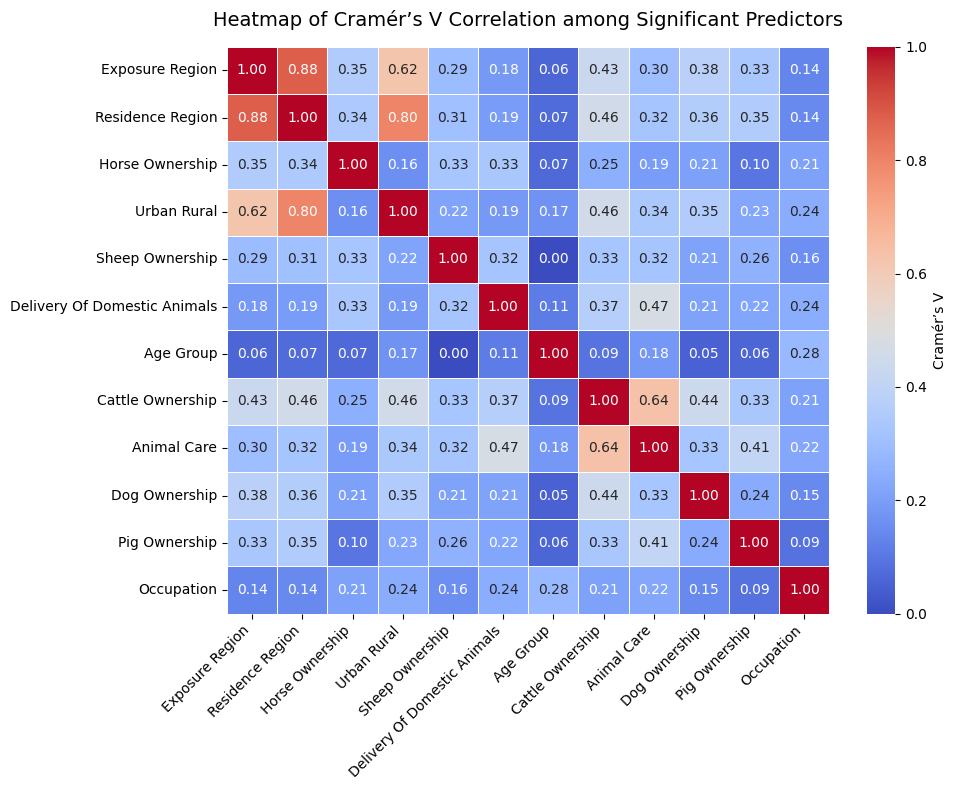

In [21]:
significant_vars = [
    'exposure_region',
    'residence_region',
    'horse_ownership',
    'urban_rural',
    'sheep_ownership',
    'delivery_of_domestic_animals',
    'age_group',
    'cattle_ownership',
    'animal_care',
    'dog_ownership',
    'pig_ownership',
    'occupation'
]

clean_names = {col: col.replace('_', ' ').title() for col in significant_vars}

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

cramers_results = pd.DataFrame(index=significant_vars, columns=significant_vars)

for var1 in significant_vars:
    for var2 in significant_vars:
        cramers_results.loc[var1, var2] = 1.0 if var1 == var2 else cramers_v(df[var1], df[var2])

cramers_results = cramers_results.astype(float)
cramers_results.rename(index=clean_names, columns=clean_names, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=0.5, cbar_kws={'label': "Cramér’s V"})
plt.title("Heatmap of Cramér’s V Correlation among Significant Predictors", fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig("cramers_v_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

# Logistic Regression

## Dropping Variables with Missing Values

In [22]:
df = df.dropna(axis=1)

## Preparing the Variables for Machine Learning Models

### Detecting Class Imbalance

In [23]:
min_prop = 0.05
min_count = 20

n = len(df)

for col in df.columns:
    counts = df[col].value_counts()
    props = counts / n
    bad_classes = counts[(counts < min_count) | (props < min_prop)]
    if not bad_classes.empty:
        print(f"\n Variable: {col}")
        print(bad_classes)


 Variable: residence_region
residence_region
6    184
9    168
7    115
3     35
1      1
Name: count, dtype: Int64

 Variable: occupation
occupation
6     187
5      88
9      60
10     56
13     29
15     28
12     18
11     12
99      7
14      1
Name: count, dtype: Int64

 Variable: exposure_region
exposure_region
9    181
7    118
3     43
1      2
Name: count, dtype: Int64

 Variable: rabbit_ownership
rabbit_ownership
1    119
Name: count, dtype: Int64

 Variable: blood_splash
blood_splash
1    36
Name: count, dtype: Int64

 Variable: skinning
skinning
1    151
Name: count, dtype: Int64

 Variable: family_group
family_group
3    101
Name: count, dtype: Int64

 Variable: age_group
age_group
2    169
1    162
Name: count, dtype: Int64

 Variable: ethnic_groups
ethnic_groups
3    62
9    49
Name: count, dtype: Int64


In [24]:
df['ethnic_groups'] = df['ethnic_groups'].replace(1, 0) # 0: Georgian
df['ethnic_groups'] = df['ethnic_groups'].replace([2, 3, 9], 1) # 1: Foreigners
df['age_group'] = df['age_group'].replace([1, 2], 0) # 0: 18-29
df['family_group'] = df['family_group'].replace(3, 2) # 2: 3+ (Medium and Large)
df['occupation'] = df['occupation'].replace([5, 9, 10, 15, 13, 12, 11, 99, 14], 0) # 0: Other
df['exposure_region'] = df['exposure_region'].replace([1, 3, 7, 9], 0) # 0: Other
df['residence_region'] = df['residence_region'].replace([1, 3, 7, 9], 0) # 0: Other

### One Hot Encoding & Scaling

In [25]:
def preprocess(df, encode_vars=None, scale_vars=None, drop_first=True):
    """
    Preprocess the dataframe:
    - One-hot encode chosen categorical variables
    - Scale chosen continuous variables
    """

    df_copy = df.copy()

    # ---- One-hot encoding ----
    if encode_vars:
        encoder = OneHotEncoder(
            sparse_output=False, 
            drop='first' if drop_first else None, 
            handle_unknown='ignore'
        )
        encoded_array = encoder.fit_transform(df_copy[encode_vars])
        encoded_df = pd.DataFrame(
            encoded_array, 
            columns=encoder.get_feature_names_out(encode_vars), 
            index=df_copy.index
        )
        df_copy = pd.concat([df_copy.drop(columns=encode_vars), encoded_df], axis=1)

    # ---- Scaling ----
    if scale_vars:
        scaler = StandardScaler()
        df_copy[scale_vars] = scaler.fit_transform(df_copy[scale_vars])

    return df_copy

In [26]:
encode_vars = ['age_group', 'family_group', 'ethnic_groups', 'occupation', 'residence_region', 'exposure_region']
df_encoded = preprocess(df, encode_vars=encode_vars)

In [27]:
encode_vars3 = ['age_group', 'family_group', 'ethnic_groups', 'occupation']

### Split the Data

In [28]:
X = df_encoded.drop('qfever', axis=1).astype('float')
y = df['qfever'].astype('float')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

N_observations, N_features = X.shape

print('Number of Observations: ' + str(N_observations))
print('Number of Features: ' + str(N_features))

Number of Observations: 3815
Number of Features: 53


## Univariate Model

In [29]:
categorical_vars = set(col.split('_')[0] for col in X_train.columns if '_' in col)

results = []

for col in X_train.columns:
    X_col = sm.add_constant(X_train[[col]])
    model = sm.Logit(y_train, X_col).fit(disp=0)
    odds_ratio = np.exp(model.params[1])
    conf = model.conf_int().loc[col]
    conf_odds = np.exp(conf)
    p_value = model.pvalues[1]
    results.append({
        'Variable': col,
        'OR': odds_ratio,
        'CI_lower': conf_odds[0],
        'CI_upper': conf_odds[1],
        'p-value': p_value
    })

univariate_results = pd.DataFrame(results)

for cat in categorical_vars:
    cat_rows = univariate_results[univariate_results['Variable'].str.startswith(cat + '_')]
    if not cat_rows.empty:
        min_p = cat_rows['p-value'].min()
        min_row = cat_rows.loc[cat_rows['p-value'] == min_p].iloc[0]
        univariate_results = univariate_results[~univariate_results['Variable'].str.startswith(cat + '_')]
        univariate_results = pd.concat([univariate_results, pd.DataFrame([{
            'Variable': cat,
            'OR': min_row['OR'],
            'CI_lower': min_row['CI_lower'],
            'CI_upper': min_row['CI_upper'],
            'p-value': min_p
        }])], ignore_index=True)

univariate_results_filtered = univariate_results[univariate_results['p-value'] < 0.2]
univariate_results_filtered['OR'] = univariate_results_filtered['OR'].round(2)
univariate_results_filtered['CI_lower'] = univariate_results_filtered['CI_lower'].round(2)
univariate_results_filtered['CI_upper'] = univariate_results_filtered['CI_upper'].round(2)

univariate_results_filtered['OR (95% CI)'] = univariate_results_filtered.apply(
    lambda row: f"{row['OR']} ({row['CI_lower']}–{row['CI_upper']})", axis=1
)

univariate_results_filtered = univariate_results_filtered[['Variable', 'OR (95% CI)', 'p-value']]
univariate_results_filtered = univariate_results_filtered.sort_values('p-value').reset_index(drop=True)

excel_filename = 'univariate_results_table.xlsx'
univariate_results_filtered.to_excel(excel_filename, index=False)

wb = load_workbook(excel_filename)
ws = wb.active

gray_fill = PatternFill(start_color="DDDDDD", end_color="DDDDDD", fill_type="solid")
center_align = Alignment(horizontal="center", vertical="center")

for i, row in enumerate(ws.iter_rows(min_row=2, max_row=ws.max_row), start=2):
    if i % 2 == 0:
        for cell in row:
            cell.fill = gray_fill
    for cell in row:
        cell.alignment = center_align
        if cell.column == 3:
            cell.number_format = '0.###E+00'

# wb.save(excel_filename)

## Multivariate Model

In [30]:
selected_vars = ['residence_region', 'horse_ownership', 'sheep_ownership', 
                 'cattle_ownership', 'delivery_of_domestic_animals', 
                 'dog_ownership', 'occupation', 'age', 'pig_ownership']

selected_cols = []
for var in selected_vars:
    matched_cols = [c for c in X_train.columns if c.startswith(var)]
    selected_cols.extend(matched_cols)

X_multiv = X_train[selected_cols]
X_multiv = sm.add_constant(X_multiv)

model_multiv = sm.Logit(y_train, X_multiv).fit()

summary = model_multiv.summary2().tables[1]
summary['OR'] = np.exp(summary['Coef.'])
summary['CI_lower'] = np.exp(summary['Coef.'] - 1.96*summary['Std.Err.'])
summary['CI_upper'] = np.exp(summary['Coef.'] + 1.96*summary['Std.Err.'])
summary['p-value'] = summary['P>|z|']

summary['OR'] = summary['OR'].round(2)
summary['CI_lower'] = summary['CI_lower'].round(2)
summary['CI_upper'] = summary['CI_upper'].round(2)

summary['p-value'] = summary['p-value'].apply(lambda x: float(f"{x:.3e}"))

summary['OR (95% CI)'] = summary.apply(lambda row: f"{row['OR']} ({row['CI_lower']}–{row['CI_upper']})", axis=1)

multiv_results = summary[['OR (95% CI)', 'p-value']].reset_index()
multiv_results.rename(columns={'index': 'Variable'}, inplace=True)
multiv_results = multiv_results.sort_values('p-value').reset_index(drop=True)

excel_filename = 'multivariate_results_table.xlsx'
multiv_results.to_excel(excel_filename, index=False)

wb = load_workbook(excel_filename)
ws = wb.active

gray_fill = PatternFill(start_color="DDDDDD", end_color="DDDDDD", fill_type="solid")
center_align = Alignment(horizontal="center", vertical="center")

for i, row in enumerate(ws.iter_rows(min_row=2, max_row=ws.max_row), start=2):
    if i % 2 == 0:
        for cell in row:
            cell.fill = gray_fill
    for cell in row:
        cell.alignment = center_align
        if cell.column == 3:
            cell.number_format = '0.###E+00'

# wb.save(excel_filename)

Optimization terminated successfully.
         Current function value: 0.340978
         Iterations 7


## Forest Plot

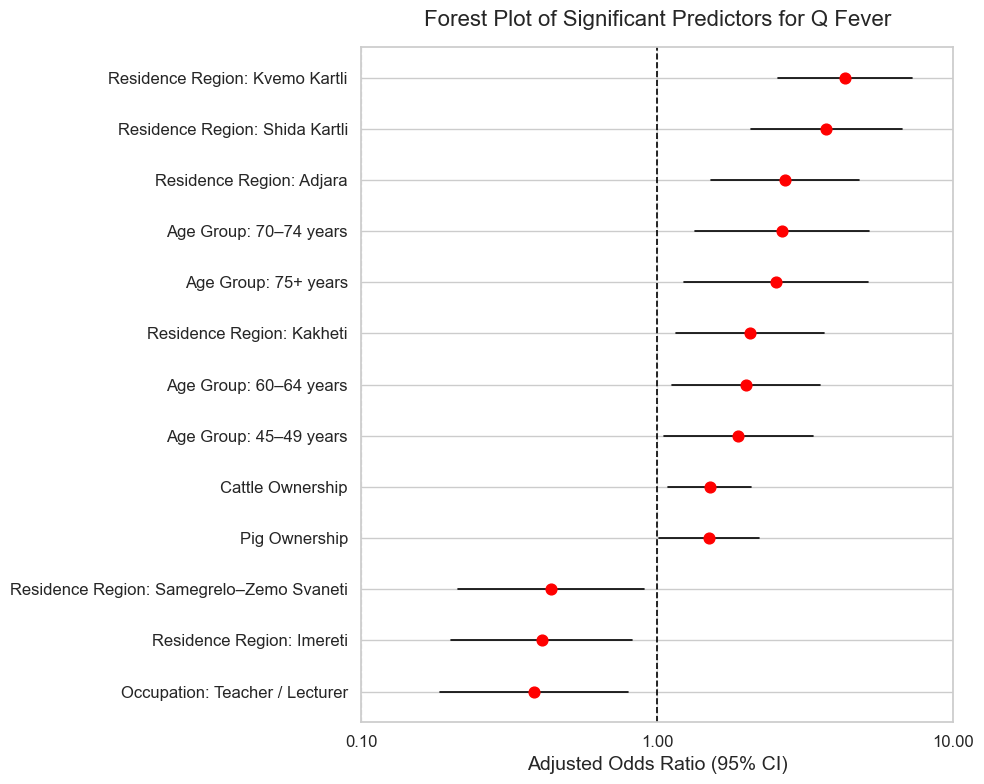

In [31]:
summary = model_multiv.summary2().tables[1].copy()
summary['OR'] = np.exp(summary['Coef.'])
summary['Lower'] = np.exp(summary['Coef.'] - 1.96 * summary['Std.Err.'])
summary['Upper'] = np.exp(summary['Coef.'] + 1.96 * summary['Std.Err.'])
summary['p-value'] = summary['P>|z|']

summary = summary.loc[(summary['p-value'] < 0.05) & (summary.index != 'const')].copy()

label_map = {
    'residence_region_10.0': 'Residence Region: Kvemo Kartli',
    'residence_region_11.0': 'Residence Region: Shida Kartli',
    'residence_region_2.0': 'Residence Region: Adjara',
    'residence_region_5.0': 'Residence Region: Kakheti',
    'residence_region_8.0': 'Residence Region: Samegrelo–Zemo Svaneti',
    'residence_region_4.0': 'Residence Region: Imereti',
    'age_group_11.0': 'Age Group: 70–74 years',
    'age_group_12.0': 'Age Group: 75+ years',
    'age_group_9.0': 'Age Group: 60–64 years',
    'age_group_6.0': 'Age Group: 45–49 years',
    'occupation_7.0': 'Occupation: Teacher / Lecturer',
    'cattle_ownership': 'Cattle Ownership',
    'pig_ownership': 'Pig Ownership'
}

summary['Clean Label'] = summary.index.map(lambda x: label_map.get(x, x))
summary = summary.sort_values(by='OR')

plt.figure(figsize=(10, len(summary) * 0.5 + 1.5))
sns.set(style="whitegrid")

for i, (idx, row) in enumerate(summary.iterrows()):
    plt.plot([row['Lower'], row['Upper']], [i, i], color='black', lw=1.2)
    plt.scatter(row['OR'], i, color='red', s=60, zorder=3)

plt.xscale('log')
plt.axvline(1, color='black', linestyle='--', lw=1.2)

xmin = summary['Lower'].min() * 0.8
xmax = summary['Upper'].max() * 1.2
plt.xlim(xmin, xmax)

log_min = np.floor(np.log10(xmin))
log_max = np.ceil(np.log10(xmax))
xticks = np.logspace(log_min, log_max, num=int(log_max - log_min + 1))
plt.xticks(xticks, [f"{x:.2f}" for x in xticks], fontsize=12)

plt.yticks(range(len(summary)), summary['Clean Label'], fontsize=12)
plt.xlabel('Adjusted Odds Ratio (95% CI)', fontsize=14)
plt.title('Forest Plot of Significant Predictors for Q Fever', fontsize=16, pad=15)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
# plt.savefig('forest_plot.png', dpi=300, bbox_inches='tight')
plt.show()

## Model Evaluation

AUC: 0.744


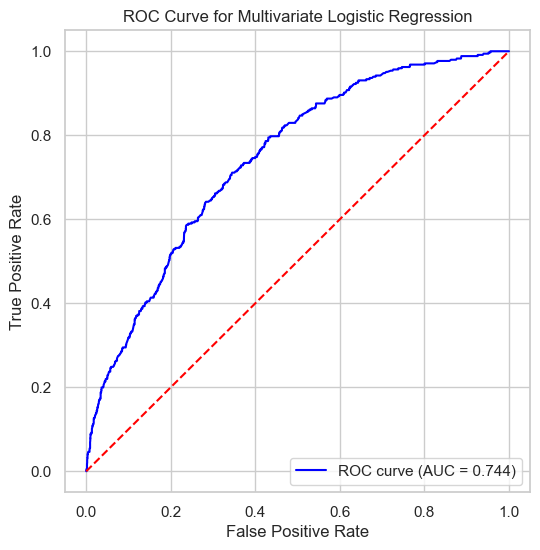

In [32]:
y_pred_prob = model_multiv.predict(X_multiv)

auc = roc_auc_score(y_train, y_pred_prob)
print(f"AUC: {auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multivariate Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [33]:
llf = model_multiv.llf
llnull = model_multiv.llnull
pseudo_r2 = 1 - (llf/llnull)
print(f"McFadden's pseudo-R²: {pseudo_r2:.3f}")

y_pred_class = (y_pred_prob >= 0.5).astype(int)
mse = np.mean((y_train - y_pred_class)**2)
print(f"MSE / ASE: {mse:.3f}")

from statsmodels.stats.outliers_influence import OLSInfluence

def hosmer_lemeshow(y_true, y_prob, g=10):
    data = pd.DataFrame({'y': y_true, 'prob': y_prob})
    data['decile'] = pd.qcut(data['prob'], g, labels=False)
    obs = data.groupby('decile')['y'].sum()
    exp = data.groupby('decile')['prob'].sum()
    n = data.groupby('decile')['y'].count()
    hl_stat = ((obs - exp)**2 / (exp * (1 - exp/n))).sum()
    from scipy.stats import chi2
    p_value = 1 - chi2.cdf(hl_stat, g-2)
    return hl_stat, p_value

hl_stat, hl_p = hosmer_lemeshow(y_train, y_pred_prob, g=10)
print(f"Hosmer-Lemeshow: chi2={hl_stat:.3f}, p-value={hl_p:.3f}")

aic_value = model_multiv.aic
print(f"Akaike Information Criterion (AIC): {aic_value:.2f}")

McFadden's pseudo-R²: 0.116
MSE / ASE: 0.129
Hosmer-Lemeshow: chi2=7.805, p-value=0.453
Akaike Information Criterion (AIC): 1884.82
